# RANDOM FOREST- BULLDOGS

<img src="PORTADA.png">

# Importar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Liberirias para crear la interface.

import ipywidgets as widgetsImportar
from __future__ import print_function
from ipywidgets import interact_manual
from random import randint
from IPython.display import display
from IPython.display import clear_output
import glob
from skimage.color import rgb2gray
import skimage.io as io
from skimage.feature import (match_descriptors, corner_harris,
 corner_peaks, ORB, plot_matches)
from skimage import data
from skimage import transform as tf
import skimage.io as io
%matplotlib inline

# Cargar fotos de perros

In [2]:
def caracteristicasBulldog(ruta):
    image_org = io.imread(ruta)
    #Se convierte la imagen a escala de grises
    image_org = rgb2gray(image_org)
    #Se inicializa ORB feature descriptor
    descriptor_extractor = ORB(n_keypoints=200)
    #Primero se extraen las caracteristicas de una imagen de muestra
    descriptor_extractor.detect_and_extract(image_org)
    keypoints_org = descriptor_extractor.keypoints
    descriptors_org = descriptor_extractor.descriptors
    return descriptors_org

In [3]:
files = glob.glob ("dogs/*.png") # Cargamos todas las imagenes.
data = []
images = []
target = []
carac = []
i = 0

descriptor_extractor = ORB(n_keypoints=200)
# Extrator de caracteristicas
BulldogAmericanoMuestra=caracteristicasBulldog("dogs/BulldogAmericano (41).png")
BulldogInglesMuestra=caracteristicasBulldog("dogs/BulldogIngles (58).png")
BulldogFrancesMuestra=caracteristicasBulldog("dogs/BulldogFrances (32).png")

"""
Son tres tipos de perros por lo tanto decidimos usar tres imagenes de muestra, se sacan las caracteristicas de cada uno y se
guardan en 3 variables. Luego en el ciclo for se cargan cada uno de las imagenes y tambien se le aplica el metodo de las
caracteristicas. Luego se compara con las tres imagenes de muestras, si resulta que con la que más coincidencias tiene es con
el bulldog americano se guardo un 1 en el array llamdo carac.Con este array sabremos si un perro peretenece o no a la clase
americano y luego si poder entrenar al ramdom forest

"""

#-----------------------------------------
for myFile in files:
    #cargamos una imagen de color en modo escala de grisis
    img = io.imread(myFile)
    img = rgb2gray(img)
    images.append (img)
    a = img.reshape((22500 ,))
    data.append(a)
    
    if i <= 69:
        target.append(0)
    elif i > 69 and i <= 139:
        target.append(1)
    else:
        target.append(2)   

    #Caracteristicas de cada imagens.    
    descriptor_extractor.detect_and_extract(images[i])
    keypoints_rot = descriptor_extractor.keypoints
    descriptors_rot = descriptor_extractor.descriptors
    
    #BulldogAmericano
    aciertoAmericano = match_descriptors(BulldogAmericanoMuestra, descriptors_rot, cross_check=True)
    #BulldogIngles
    aciertoIngles = match_descriptors(BulldogInglesMuestra, descriptors_rot, cross_check=True)
    #BulldogFrances.
    aciertoFrances = match_descriptors(BulldogFrancesMuestra, descriptors_rot, cross_check=True)
    
    print(len(aciertoAmericano),len(aciertoIngles),len(aciertoFrances))
    
    if len(aciertoAmericano) > len(aciertoIngles) and len(aciertoAmericano) > len(aciertoFrances):
        race = 1
    else:
        race = 0
    
    carac.append(race)
    i+=1

dat = np.array(data)
tar = np.array(target)
q = np.array(images)
dic = {'data': dat, 'images': q, 'target' : tar}

C:\Users\lenovo\Anaconda3\lib\site-packages\skimage\feature\match.py:49: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  if np.issubdtype(descriptors1.dtype, np.bool):


55 73 55
59 47 48
68 63 57
53 52 56
46 44 47
62 69 54
65 66 77
50 63 57
42 62 53
55 48 63
57 56 46
59 67 57
70 66 65
49 60 64
49 57 44
62 65 56
47 58 59
68 66 76
59 66 63
75 62 56
66 66 71
51 50 52
53 55 54
60 58 57
62 65 56
47 58 59
51 50 52
68 66 76
75 62 56
60 58 57
51 58 55
58 65 55
60 55 57
49 56 39
71 74 66
200 62 48
62 75 50
74 68 71
53 55 55
62 71 68
65 73 64
38 42 43
45 49 53
43 40 41
56 54 51
51 46 40
52 64 50
54 61 60
65 65 67
64 63 60
66 74 72
58 56 50
56 64 57
47 41 44
64 65 67
65 68 62
64 72 67
45 58 55
62 61 60
75 67 63
57 56 56
60 64 59
43 30 46
48 44 47
53 52 53
54 60 53
52 46 58
53 65 61
57 65 58
52 64 52
62 56 57
59 45 56
57 66 58
47 56 55
55 52 58
58 58 64
63 69 65
53 55 54
61 59 58
67 60 62
49 47 52
47 46 55
58 63 64
55 53 51
67 64 59
54 65 46
48 55 50
58 72 58
62 67 57
51 47 43
58 54 52
61 58 59
55 56 168
51 56 55
57 62 59
48 57 200
51 46 49
55 55 55
63 62 61
51 52 48
56 59 52
66 58 66
43 56 65
64 68 54
64 69 68
43 58 53
62 63 65
55 61 53
61 65 70
61 57 60
49 45 3

In [4]:
def mostrarBulldogs(images, target, top_n):
    # Definit el tamaño de la configuracion de la matriz de imagenes.
    fig = plt.figure(figsize=(12,12))
    fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.0)
    for i in range(top_n):
        j = randint(0,len(dic["data"]))
        #Dibujar las imagenes en una matriz de 15x15
        d = fig.add_subplot(10,10, i + 1, xticks=[], yticks=[])
        d.imshow(images[j], cmap=plt.cm.bone)
        
        #Etiquetada de cada imagen con target de tipo valor.
        if target[j]==0:
            d.text(0,14,"Americano")  
        elif target[j]==1:
            d.text(0,14,"Frances")
        else:
            d.text(0,14,"Ingles") 

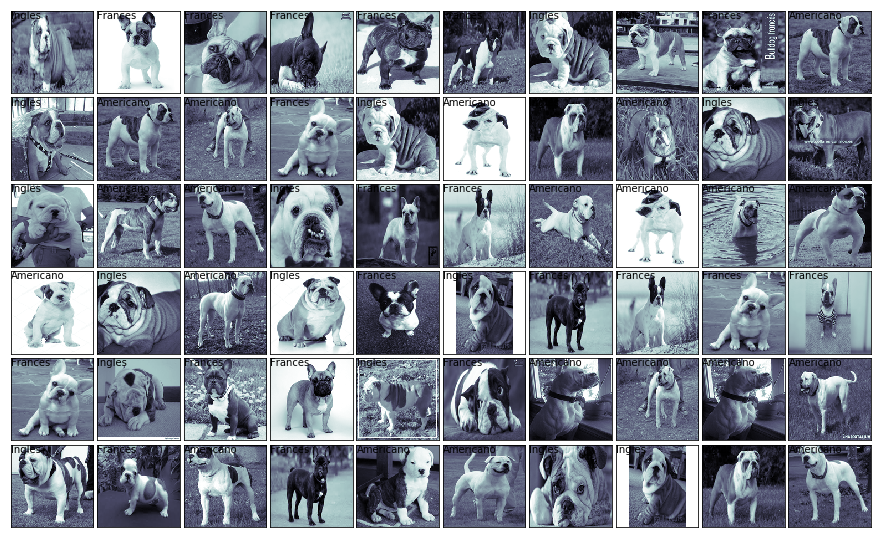

In [5]:
mostrarBulldogs(dic['images'],dic['target'],60)

# Vectores de caracteristicas

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X= dic['data'] # Es donde se encuentran todas las imagenes.
y= carac # Variable objetiva es lo que se desea predecir. 

In [8]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=.3)

# Algoritmo de arboles de decision.

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dtree = DecisionTreeClassifier() # Instancia de objeto de tipo de arbol de decision.

In [11]:
dtree.fit(X_train,y_train) #Algoritmo entrenado.

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Prediccion y Evaluacion

In [12]:
prediction = dtree.predict(X_test)

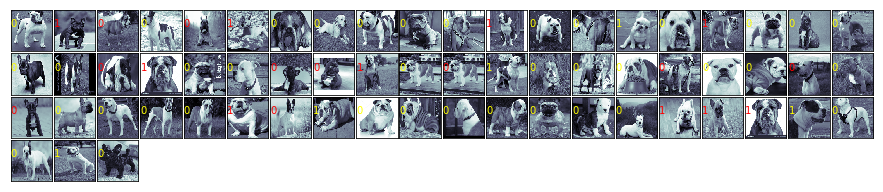

In [13]:

# Definit el tamaño de la configuracion de la matriz de imagenes.
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.0)
cont1=0
for i in range(len(prediction)):
    #Dibujar las imagenes en una matriz de 15x15
    d = fig.add_subplot(20,20, i + 1, xticks=[], yticks=[])
    d.imshow(X_test.reshape(-1,150,150)[i], cmap=plt.cm.bone)

    #Etiquetada de cada imagen con target de tipo valor.

    if prediction[i]==y_test[i]:

        d.text(0,60,str(prediction[i]),color='yellow')
        cont1+=1
    else:
        d.text(0,60,str(prediction[i]),color='red')
        cont1+=1
    
    

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.79      0.79      0.79        48
          1       0.33      0.33      0.33        15

avg / total       0.68      0.68      0.68        63



In [16]:
print(confusion_matrix(y_test,prediction))

[[38 10]
 [10  5]]


Button(description='Muestra aleatorio', layout=Layout(width='150px'), style=ButtonStyle())

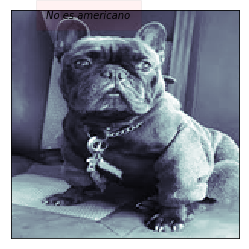

In [30]:
button= widgetsImportar.Button(description="Muestra aleatorio",layout=widgetsImportar.Layout(width="150px",button_style="success"))
display(button)
def on_button_clicked(b):
    clear_output(wait=False)
    display(button)
    
    num = randint(0,len(prediction)-1)
    
    fig=plt.figure(figsize=(100,100))
    d=fig.add_subplot(20,20,1,xticks=[],yticks=[])
    d.imshow(X_test.reshape(-1,150,150)[num],cmap=plt.cm.bone)
    
    if prediction[num]==1:
        etiqueta="Americano"
    else:
        etiqueta="No es americano"
    if prediction[num]==1:
        
        d.text(23,5,etiqueta,style="italic",bbox={"facecolor":"green","alpha":0.05,"pad":10})
    else:
        d.text(23,5,etiqueta,style="italic",bbox={"facecolor":"red","alpha":0.05,"pad":10})
        
button.on_click(on_button_clicked)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc= RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
rfc_pred=rfc.predict(X_test)

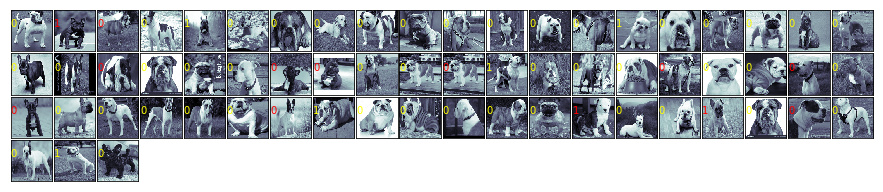

In [21]:
# Definit el tamaño de la configuracion de la matriz de imagenes.
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.0)
cont1=0
for i in range(len(rfc_pred)):
    #Dibujar las imagenes en una matriz de 15x15
    d = fig.add_subplot(20,20, i + 1, xticks=[], yticks=[])
    d.imshow(X_test.reshape(-1,150,150)[i], cmap=plt.cm.bone)

    #Etiquetada de cada imagen con target de tipo valor.

    if rfc_pred[i]==y_test[i]:

        d.text(0,60,str(rfc_pred[i]),color='yellow')
        cont1+=1
    else:
        d.text(0,60,str(rfc_pred[i]),color='red')
        cont1+=1

In [22]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.82      0.94      0.87        48
          1       0.62      0.33      0.43        15

avg / total       0.77      0.79      0.77        63



In [23]:
print(confusion_matrix(y_test,rfc_pred))

[[45  3]
 [10  5]]


Button(description='Muestra aleatorio', layout=Layout(width='300px'), style=ButtonStyle())

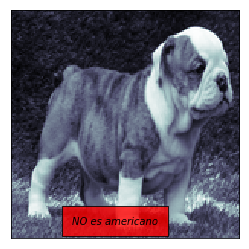

In [29]:
button= widgetsImportar.Button(description="Muestra aleatorio",layout=widgetsImportar.Layout(width="300px",button_style="success"))
display(button)
def on_button_clicked(b):
    clear_output(wait=False)
    display(button)
    
    num = randint(0,len(rfc_pred)-1)
    
    fig=plt.figure(figsize=(100,100))
    d=fig.add_subplot(20,20,1,xticks=[],yticks=[])
    d.imshow(X_test.reshape(-1,150,150)[num],cmap=plt.cm.bone)
    
    if rfc_pred[num]==1:
        etiqueta="Americano"
    else:
        etiqueta="NO es americano"
    if rfc_pred[num]==y_test[num]:
        
        d.text(40,140,etiqueta,style="italic",bbox={"facecolor":"red","alpha":0.8,"pad":10})
    else:
        d.text(40,140,etiqueta,style="italic",bbox={"facecolor":"blue","alpha":0.8,"pad":10})
        
button.on_click(on_button_clicked)